# Demonstration of the Central Limit Theorem

We create an "unusual-looking" distribution by taking a mixture of two normal distributions with different means and standard deviations.

We take many samples from this distribution and calculate the mean of each sample, then plot the histogram of these means, which is approximately normal.

Due to the Central Limit Theorem, the histogram of the means will be approximately normal, regardless of the shape of the original distribution.

In [110]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

def sample_mixture(n_samples, dist1, dist2, weight1=0.5):
    """
    Sample from a mixture of two distributions
    
    Parameters:
    n_samples: number of samples to generate
    dist1, dist2: the component scipy.stats distributions
    weight1: weight of the first distribution (between 0 and 1)
    
    Returns:
    Array of samples from the mixture distribution
    """
    # Step 1: Randomly decide which distribution to sample from
    component_choices = np.random.binomial(1, weight1, n_samples)
    
    # Step 2: Generate samples
    samples = np.zeros(n_samples)
    
    # Samples from the first distribution
    samples_from_dist1 = dist1.rvs(size=np.sum(component_choices))
    
    # Samples from the second distribution
    samples_from_dist2 = dist2.rvs(size=n_samples-np.sum(component_choices))
    
    # Combine the samples
    samples[component_choices == 1] = samples_from_dist1
    samples[component_choices == 0] = samples_from_dist2
    
    return samples

In [111]:
def plot_sample_mixture(mu1, mu2, sigma1, sigma2, weight1=0.5, n_samples=10_000):
	"""
	Sample from a mixture of two normal distributions and plot the histogram
	with the theoretical PDF of the mixture distribution
	"""
	# Define the distributions
	d1 = stats.norm(mu1, sigma1)
	d2 = stats.norm(mu2, sigma2)

	# Generate samples (equal weights by default)
	samples = sample_mixture(10000, d1, d2)

	# You can verify your sampling with a histogram
	plt.hist(samples, bins=50, density=True, alpha=0.6)

	# Compare with the theoretical PDF
	x = np.linspace(samples.min(), samples.max(), 1000)
	y = 0.5 * d1.pdf(x) + 0.5 * d2.pdf(x)  # Equal weights of 0.5
	plt.plot(x, y, 'r-', lw=2)

	plt.title('Mixture of Two Normal Distributions')
	plt.xlabel('x')
	plt.ylabel('Probability Density')
	plt.show()
 

def plot_sample_mixture_means(mu1, mu2, sigma1, sigma2, weight1=0.5, n_samples=10_000, n_means=10_000):
	"""
	Plot the histogram of the means of the samples from the mixture distribution

	Take a large number of samples from the mixture distribution and compute the mean of each sample.
	Plot the histogram of the means.
	
	Due to the Central Limit Theorem, the histogram of the means will be approximately normal
	when n_samples is large.
	"""
    # Define the distributions
	d1 = stats.norm(mu1, sigma1)
	d2 = stats.norm(mu2, sigma2)
 
	# Sample n_means times, each time sample n_samples from the mixture distribution
	# and compute the mean of the samples
	means = np.array([sample_mixture(n_samples, d1, d2).mean() for _ in range(n_means)])
 
	# Plot the histogram of the means
	plt.hist(means, bins=50, density=True, alpha=0.6)
 
	# Plot the theoretical PDF of the mean of the mixture distribution
 
	# Compute the mean and variance of the mixture distribution
	mu = mu1 * weight1 + mu2 * (1 - weight1)
	var = weight1*sigma1**2 + (1-weight1)*sigma2**2 + weight1*(1-weight1)*(mu1-mu2)**2
	sigma = np.sqrt(var/n_samples)  # the std of the mean of the mixture distribution
	
	r = max(means.max()-mu, mu-means.min())
	x = np.linspace(mu-r, mu+r, 1000)	
	y = stats.norm(mu, sigma).pdf(x)
	plt.plot(x, y, 'r-', lw=2)
 
	plt.title('Mean of Mixture of Two Normal Distributions')
	plt.xlabel('Mean')
	plt.ylabel('Frequency')
	plt.show()

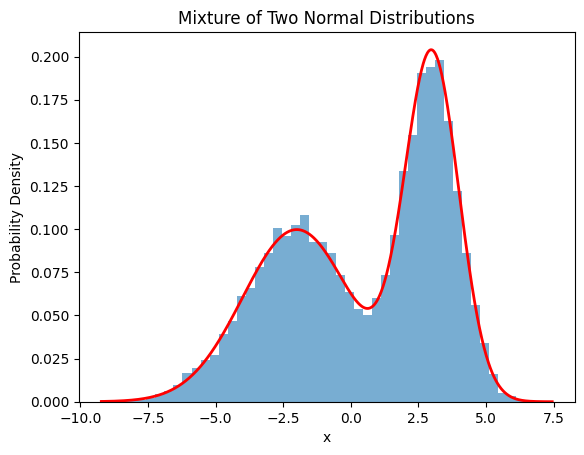

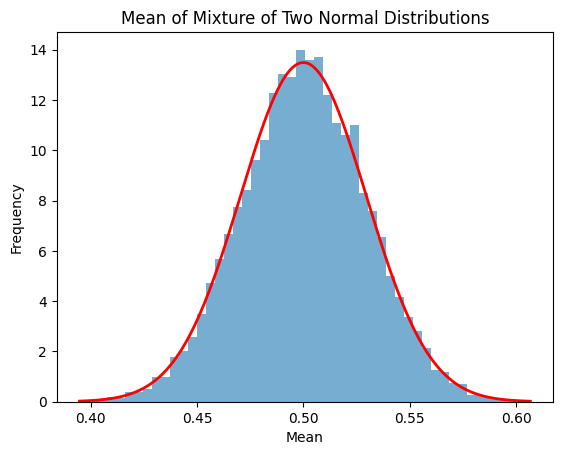

In [112]:
mu1, mu2 = -2, 3
sigma1, sigma2 = 2, 1
weight1 = 0.5
n_samples = 10000

plot_sample_mixture(mu1, mu2, sigma1, sigma2, weight1)
plot_sample_mixture_means(mu1, mu2, sigma1, sigma2, weight1)